In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utility.graphing_tools import single_dim_comparison, generate_latex_table_from_csvs, method_name_coverter, heavy_t_comparison
from utility.exps import run_synthetic_experiment, heavy_t

In [48]:
method_list_baselines = ["Point_CHR", "Unscaled", "Empirical_copula", "TSCP_R"]
method_name_list_baselines = method_name_coverter(method_list=method_list_baselines)

method_list_ours1 = ["TSCP_R", "TSCP_S", "Population_oracle", "Naive"]
method_name_list_ours1 = method_name_coverter(method_list_ours1)

method_list_ours2 = ["TSCP_R", "TSCP_GWC", "TSCP_LWC", "Population_oracle"]
method_name_list_ours2 = method_name_coverter(method_list_ours2)

method_list_ours3 = ["TSCP_R", "TSCP_GWC", "TSCP_S", "Population_oracle", "Naive"]
method_name_list_ours3 = method_name_coverter(method_list_ours3)

method_list_ours4 = ["TSCP_R", "TSCP_GWC", "TSCP_LWC", "TSCP_S", "Population_oracle", "Naive"]
method_name_list_ours4 = method_name_coverter(method_list_ours4)

In [82]:
from scipy.spatial import transform
from utility.rectangle import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import OrderedDict
from matplotlib.patches import Patch
import matplotlib.patches as patches
from matplotlib.lines import Line2D

sns.set_theme(
    style="whitegrid",  # beautiful light grid, best for scientific plots
    context="paper",     # good scaling
    font_scale=1.2,
    rc={
    "lines.linewidth": 2,
    "lines.markersize": 7,
    "axes.labelsize": 11,
    "axes.titlesize": 11,
    "legend.fontsize": 11,
}
)

# Fixed method order (edit to match your actual experiments)
METHOD_ORDER = ["Unscaled Max", "Emp. Copula", "Pop. Oracle", "TSCP-R", "TSCP-S", "Point CHR", "Bonferroni",  "Naive", "TSCP-GWC", "TSCP-LWC"]

# Consistent color palette across all figures
PALETTE = sns.color_palette("deep", n_colors=len(METHOD_ORDER))
METHOD_COLORS = dict(zip(METHOD_ORDER, PALETTE))

# Consistent markers across all figures
MARKERS = ["o", "s", "D", "^", "v", "<", ">", "P", "X", "*"]
METHOD_MARKERS = dict(zip(METHOD_ORDER, MARKERS))


def method_name_coverter(method_list):
    method_name_list = {}
    for method in method_list:
        if method == "Point_CHR":
            method_name = "Point CHR"
        elif method == "TSCP_R":
            method_name = "TSCP-R"
        elif method == "TSCP_S":
            method_name = "TSCP-S"
        elif method == "Unscaled":
            method_name = "Unscaled Max"
        elif method == "Empirical_copula":
            method_name = "Emp. Copula"
        elif method == "TSCP_LWC":
            method_name = "TSCP-LWC"
        elif method == "Population_oracle":
            method_name = "Pop. Oracle"
        elif method == "Bonferroni":
            method_name = "Bonferroni"
        elif method == "TSCP_GWC":
            method_name = "TSCP-GWC"
        elif method == "Naive":
            method_name = "Naive"
        method_name_list[method] = method_name
    return method_name_list



    from utility.res_rescaled import one_rect_prediction_regions_nD, check_coverage_rate
    from utility.unscaled import no_scaling_prediction_region
    from utility.data_splitting import data_splitting_scaling_prediction_region, data_spliting_CHR_prediction_region
    from utility.copula import empirical_copula_prediction_region
    scores_cal20 = scores_cal
    LPRO20 = one_rect_prediction_regions_nD(scores_cal20, alpha)
    LPR20 = one_rect_prediction_regions_nD(scores_cal20, alpha, False)[0]
    DSS20 = data_splitting_scaling_prediction_region(scores_cal20, alpha=alpha)
    DSCHR20 = data_spliting_CHR_prediction_region(scores_cal20, alpha=alpha)
    NPR20 = no_scaling_prediction_region(scores_cal20, alpha=alpha)
    EMPC = empirical_copula_prediction_region(scores_cal20, alpha=alpha)

    vol_LPR20 = 0
    for reg in LPR20:
        vol_LPR20 += reg.volume()

    '''
    # Export table info
    table_arr = [["Unscaled", NPR20.volume(), check_coverage_rate(scores_test, NPR20)],
            ["Splitting baseline", DSS20.volume(), check_coverage_rate(scores_test, NPR20)],
            ["Point CHR", DSCHR20.volume(), check_coverage_rate(scores_test, NPR20)],
            ["Empirical copula", EMPC.volume(), check_coverage_rate(scores_test, NPR20)],   
            ["Scaling-based (F)", LPRO20.volume(), check_coverage_rate(scores_test, NPR20)],
            ["Scaling-based", vol_LPR20], check_coverage_rate(scores_test, NPR20)]
    column_labels = ["Method Name", "Volume"]
    table = pd.DataFrame(table_arr, columns=column_labels)
    latex_table = table.to_latex(index=False)
    with open("illustrations_in_paper/n20_d2.tex", "w") as f:
        f.write(latex_table)
    '''

    fig, ax = plt.subplots(1, 1, figsize = (5.5, 2), dpi = 900)

    # Draw test scores and LPR
    graphing_tools_2D(ax, scores=scores_cal20, regions=LPR20, linewidth=0.3)
    LPRO20.draw_2D(ax, boundary_color="Black", fill_color = None, transparency = 1)
    DSS20.draw_2D(ax, boundary_color="Gray", fill_color=None, transparency = 1)
    DSCHR20.draw_2D(ax, boundary_color="Brown", fill_color=None, transparency = 1)
    NPR20.draw_2D(ax, boundary_color="Green", fill_color=None, transparency = 1)
    EMPC.draw_2D(ax, boundary_color="Darkblue", fill_color=None, transparency = 1)

    # Styles
    score_legend = Line2D([0], [0], marker='o', color='w', label='Calibration Scores',
                        markerfacecolor="#1f77b4", markersize=5)
    LPR_legend = Patch(facecolor="#fca3a3", edgecolor='none', label="Scaling-based")
    LPRO_legend = Patch(facecolor="None", edgecolor="Black", label="Scaling-based (F)")
    NPR_legend = Patch(facecolor="None", edgecolor="Green", label="Unscaled")
    DSS_legend = Patch(facecolor="None", edgecolor="Gray", label="Splitting baseline")
    DSCHR_legend = Patch(facecolor="None", edgecolor="Brown", label="Point CHR")
    EMPC_legend = Patch(facecolor="None", edgecolor="Darkblue", label="Empirical copula")
    fig.legend(handles = [NPR_legend, DSS_legend, DSCHR_legend, EMPC_legend, LPRO_legend, LPR_legend, score_legend], loc=legend_loc, ncol = n_cols, bbox_to_anchor=bbox_to_anchor, frameon = False)

    return fig, ax

def prepare_long_form(df_dict):
    """
    Convert df_dict[method] (wide format) into a single long-form df
    usable by seaborn.
    """
    frames = []
    metric_pairs = [
        ("test_coverage_avg",  "test_coverage_1std"),
        ("coverage_vol_avg",   "coverage_vol_1std"),
        ("runtime_avg",        None)
    ]

    for method, df in df_dict.items():
        df_temp = df.copy()
        df_temp["method"] = method

        for metric, std_col in metric_pairs:
            tmp = df_temp[["method", "n_dim", "n_cals", metric]].copy()
            tmp = tmp.rename(columns={metric: "metric_value"})
            tmp["metric_name"] = metric

            if std_col is not None:
                tmp["metric_std"] = df_temp[std_col]
            else:
                tmp["metric_std"] = np.nan

            frames.append(tmp)

    long_df = pd.concat(frames, ignore_index=True)
    return long_df
    
def single_dim_comparison(
    df_dict, dim, 
    include_runtime=True,
    include_legend=True,
    figsize=(12, 3),
    legend_bbox=(1.02, 0.5),
    ncols=2,
    direction = "Horizontal",
    ylim = (0.6, 1)
):
    # Gather all data for n_dim == dim
    long_df = prepare_long_form(df_dict)
    df = long_df[long_df["n_dim"] == dim]

    # Panels to plot
    panels = ["test_coverage_avg", "coverage_vol_avg"]
    titles = ["Test Coverage", "Volume"]

    # Add Runtime data
    if include_runtime:
        panels.append("runtime_avg")
        titles.append("Runtime (log10-scale)")

    # Create figure
    if direction == "Horizontal":
        fig, axes = plt.subplots(
            1, len(panels),
            figsize=figsize,
            sharex=True
        )
    else:
        fig, axes = plt.subplots(
            len(panels), 1,
            figsize=figsize,
            sharex=True
        )

    # Enumerate the axes
    axes = axes.flatten()

    for ax, metric, title in zip(axes, panels, titles):

        plot_df = df[df["metric_name"] == metric].copy()

        # Runtime → log10 scale
        if metric == "runtime_avg":
            plot_df["metric_value"] = np.log10(plot_df["metric_value"])

        # Main seaborn line plot
        sns.lineplot(
            data=plot_df,
            x="n_cals",
            y="metric_value",
            hue="method",
            style="method",
            hue_order=METHOD_ORDER,
            style_order=METHOD_ORDER,
            dashes=False,
            palette=METHOD_COLORS,
            markers=METHOD_MARKERS,
            ax=ax
        )

        # Add fancy gray panel title
        rect = patches.Rectangle(
            (0, 1.02), 1, 0.14,
            transform = ax.transAxes,
            color = "#E0E0E0",
            clip_on = False,
            zorder = -1
        )
        ax.add_patch(rect)

        # Axis scaling
        ax.set_xscale("log")
        ticks = sorted(plot_df["n_cals"].unique())
        ax.set_xticks(ticks)
        ax.set_xticklabels(ticks)
        ax.set_xlabel("Calibration Sample Size")
        ax.set_ylabel("Mean")
        

        if metric == "coverage_vol_avg" and dim > 2:
            ax.set_yscale("log")
        if metric == "test_coverage_avg":
            ax.axhline(0.90, color="black", linestyle="--", linewidth=1)
            ax.set_ylim(ylim)

        ax.set_title(title)
        ax.grid(True)

    # Legend (single shared)
    if include_legend:
        handles, labels = axes[0].get_legend_handles_labels()
        methods_drawn = sorted(long_df["method"].unique())   # or filtered per subplot

        filtered_handles = []
        filtered_labels = []

        for h, lbl in zip(handles, labels):
            if lbl in methods_drawn:
                filtered_handles.append(h)
                filtered_labels.append(lbl)

        # Global legend
        fig.legend(
            filtered_handles, filtered_labels,
            loc="center left",
            bbox_to_anchor=legend_bbox,
            frameon=False,
            ncol=ncols,
            title = "Method"
        )
    for ax in axes:
        if ax.get_legend() is not None:
            ax.get_legend().remove()

    fig.tight_layout(rect=[0, 0, 0.85, 1])
    return fig, axes

def heavy_t_comparison(
    df_dict, dim, sample,
    include_runtime = True, 
    include_legend=True, 
    n_cols=2,
    loc = "center left",
    bbox_to_anchor=(1.02, 0.5),
    figsize = (11, 3),
    error_bar = True,
    error_bar_capsize=4
):

    # Safely filter data
    filtered_dict = {
        method: df[(df["n_dim"] == dim) & (df["n_cals"] == sample)].copy()
        for method, df in df_dict.items()
    }
    if include_runtime:
        fig, axes = plt.subplots(1, 3, figsize=figsize, sharex=True)
    else:
        fig, axes = plt.subplots(1, 2, figsize=figsize, sharex=True)
    axes = axes.flatten()

    for index, ax in enumerate(axes):
        ax.set_xscale("log")
        if index == 0:
            metric = "test_coverage_avg"
            ax.set_ylim(0.7, 1)
            ax.axhline(y=0.9, color="red", linestyle='--', linewidth=1)
            title = "Test Coverage"
        elif index == 1:
            metric = "coverage_vol_avg"
            title = "Volume"
            ax.set_yscale("log")
            ax.set_xlabel("No. of Degree of Freedom")
        else:
            metric = "runtime_avg"
            title = r"Runtime ($\log_{10}$-Scale)"

        for method, df in filtered_dict.items():
            plot_data = df[df["df"] < 100].copy()
            if index == 2:
                plot_data[metric] = np.log10(plot_data[metric])

            # Fallbacks if your dicts aren't global
            m = markers.get(method, 'o') if 'markers' in globals() else 'o'
            c = colors.get(method, 'black') if 'colors' in globals() else 'black'

            if index == 0:

                if error_bar:
                    yerr = plot_data["test_coverage_1std"].to_numpy()
                    ax.errorbar(
                        plot_data["df"], plot_data[metric],
                        yerr=yerr, fmt=m + "-", color=c,
                        capsize=error_bar_capsize, elinewidth=1, linewidth=1,
                        label=method
                    )

                ax.plot(
                    plot_data["df"], plot_data[metric],
                    label=method, marker=m, color=c,
                    linestyle="-", linewidth=1
                )
                
            elif index == 1:

                if error_bar:
                    yerr = plot_data["coverage_vol_1std"].to_numpy()
                    ax.errorbar(
                    plot_data["df"], plot_data[metric],
                    yerr=yerr, fmt=m + "-", color=c,
                    capsize=error_bar_capsize, elinewidth=1, linewidth=1,
                    label=method
                    )

                ax.plot(
                    plot_data["df"], plot_data[metric],
                    label=method, marker=m, color=c,
                    linestyle="-", linewidth=1
                )
            elif index == 2:
                ax.plot(
                    plot_data["df"], plot_data[metric],
                    label=method, marker=m, color=c,
                    linestyle="-", linewidth=1
                )
                
        ax.set_title(title)
        ax.grid(True)

    handles, labels = axes[0].get_legend_handles_labels()
    if include_legend:
        fig.legend(handles, labels, loc=loc, ncol=n_cols,
                   bbox_to_anchor=bbox_to_anchor, frameon=False)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    return fig, axes

def compare_across_dims(
    df_dict, figsize=(12, 3),
    include_legend=True,
    legend_bbox = (1.02, 0.5),
    ncols=2,
    ylim = (0.7, 1)
):
    # ------------------------------------------
    # Convert df_dict into a long-form dataframe
    # ------------------------------------------
    # Gather all data for n_dim == dim
    long_df = prepare_long_form(df_dict)

    # ------------------------------------------
    # Prepare subplots
    # ------------------------------------------
    fig, axes = plt.subplots(1, 3, figsize=figsize)

    # Panels to plot
    panels = ["test_coverage_avg", "coverage_vol_avg", "runtime_avg"]
    titles = ["Test Coverage", "Volume", "Runtime"]

    axes = axes.flatten()

    for ax, metric, title in zip(axes, panels, titles):

        plot_df = long_df[long_df["metric_name"] == metric].copy()

        # Runtime → log10 scale
        if metric == "runtime_avg":
            plot_df["metric_value"] = np.log10(plot_df["metric_value"])


        sns.lineplot(
                data=plot_df,
                x="n_dim",
                y="metric_value",
                hue="method",
                style="method",
                hue_order=METHOD_ORDER,
                style_order=METHOD_ORDER,
                dashes=False,
                palette=METHOD_COLORS,
                markers=METHOD_MARKERS,
                ax=ax
            )

        # Add fancy gray panel title
        rect = patches.Rectangle(
                (0, 1.02), 1, 0.14,
                transform = ax.transAxes,
                color = "#E0E0E0",
                clip_on = False,
                zorder = -1
        )
        ax.add_patch(rect)

        # Axis scaling
        ax.set_xscale("log")
        ticks = sorted(plot_df["n_dim"].unique())
        ax.set_xticks(ticks)
        ax.set_xticklabels(ticks)
        ax.set_xlabel("Dimensions")
        ax.set_ylabel("Mean")


        if metric == "coverage_vol_avg":
            ax.set_yscale("log")
        if metric == "test_coverage_avg":
            ax.axhline(0.90, color="black", linestyle="--", linewidth=1)
            ax.set_ylim(ylim)
        if metric == "runtime_avg":
            ax.set_ylabel(r"$\log_{10}$(Mean)")

        ax.set_title(title)
        ax.grid(True)

    
    # Legend (single shared)
    if include_legend:
        handles, labels = axes[0].get_legend_handles_labels()
        methods_drawn = sorted(long_df["method"].unique())   # or filtered per subplot

        filtered_handles = []
        filtered_labels = []

        for h, lbl in zip(handles, labels):
            if lbl in methods_drawn:
                filtered_handles.append(h)
                filtered_labels.append(lbl)

        # Global legend
        fig.legend(
            filtered_handles, filtered_labels,
            loc="center left",
            bbox_to_anchor=legend_bbox,
            frameon=False,
            ncol=ncols,
            title = "Method"
        )
    for ax in axes:
        if ax.get_legend() is not None:
            ax.get_legend().remove()

    fig.tight_layout(rect=[0, 0, 0.85, 1])
    return fig, axes

def single_dim_text_file(methods, dim, sample_list, trials, alpha, noise_list, log_scale = True, output_path = "results.txt"):
    from utility.exps import run_synthetic_experiment
    output = {}
    for method in methods:
        output[method] = run_synthetic_experiment(dim_list= [dim], sample_list=sample_list, alpha_list=[alpha], trials=trials, method=method, noises_list=noise_list, log_scale=log_scale)
    with open(output_path, "w") as f:
        for method, df in output.items():
            f.write(f"Method: {method}\n")
            f.write(df.to_string(index=False))
            f.write("\n\n" + "-"*60 + "\n\n")

def generate_latex_table_from_csvs(
    file_dict, dim, 
    noise_type, 
    method_exlude = ["Naive", "Emp. Copula"],
    filename="table_dX.tex"
):

    combined = []

    # Combine all CSV results
    for method, data in file_dict.items():
        df = data.copy()
        df["method"] = method
        combined.append(df)

    df_all = pd.concat(combined)

    # Filter by dimension
    df_all = df_all[df_all["n_dim"] == dim]
    df_all = df_all.sort_values(by=["n_cals", "method"])

    lines = []
    lines.append("\\begin{tabular}{l l c c c}")
    lines.append("\\toprule")
    lines.append("(n, d, Noise) & Method & Coverage & Volume & Runtime \\\\")
    lines.append("\\midrule")

    for n_cals in df_all["n_cals"].unique():

        subset = df_all[df_all["n_cals"] == n_cals]
        n_methods = len(subset)

        # --- EXCLUDE CERTAIN METHODS FROM MIN-VOLUME SEARCH ---
        subset_for_min = subset[
            ~subset["method"].isin(["Naive", "Emp. Copula"])
        ]
        if subset_for_min.empty:  # safety fallback
            subset_for_min = subset

        min_vol = subset_for_min["coverage_vol_avg"].min()
        # ------------------------------------------------------

        for idx, (_, row) in enumerate(subset.iterrows()):

            # Multirow label for n_cals
            cal_label = (
                f"\\multirow{{{n_methods}}}{{*}}{{({int(n_cals)}, {int(dim)}, {noise_type})}}"
                if idx == 0 else ""
            )

            # Coverage formatting
            coverage_avg = row['test_coverage_avg']
            coverage_std = row['test_coverage_1std']
            coverage_text = f"{coverage_avg:.3f} ({coverage_std:.3f})"

            # Volume formatting
            vol_mean = row['coverage_vol_avg']
            vol_std = row['coverage_vol_1std']
            volume_text = f"{vol_mean:.3e}({vol_std:.3e})"

            # ========= BLUE HIGHLIGHT FOR FAILED COVERAGE =========
            if coverage_avg <= 0.89:
                coverage_text = f"\\textcolor{{blue}}{{{coverage_text}}}"
            # ======================================================

            # ========= RED HIGHLIGHT FOR MINIMUM VOLUME ===========
            if (
                row["method"] not in ["Naive", "Emp. Copula"] 
                and vol_mean == min_vol
            ):
                volume_text = f"\\textcolor{{red}}{{{volume_text}}}"
            # ======================================================

            # Runtime formatting
            runtime_text = f"{row['runtime_avg']:.3f}"

            # Compose row
            lines.append(
                f"{cal_label} & {row['method']} & "
                f"{coverage_text} & {volume_text} & {runtime_text} \\\\"
            )

        lines.append("\\midrule")

    lines.append("\\bottomrule")
    lines.append("\\end{tabular}")

    # Output filename
    filename = filename.replace("dX", f"d{dim}")

    with open(filename, "w") as f:
        f.write("\n".join(lines))



def format_pm(mean, std, sci=False, highlight=False):
    """Format as mean(std), optionally in scientific notation and highlighted."""
    if pd.isna(mean) or pd.isna(std):
        return f"\\text{{inf}}"
    if sci:
        mean_str = f"{mean:.3e}"
        std_str = f"{std:.3e}"
    else:
        mean_str = f"{mean:.3f}"
        std_str = f"{std:.3f}"
    result = f"{mean_str}({std_str})"
    if highlight:
        return f"\\textcolor{{red}}{{{result}}}"
    return result


def extract_stats(df):
    """Return dict[method] = (cov, cov_std, vol, vol_std)."""
    stats = {}
    for _, row in df.iterrows():
        m = row["Methods"].strip()
        stats[m] = (
            row["test_coverage_avg"],
            row["test_coverage_1std"],
            row["coverage_vol"],
            row["coverage_vol_1std"],
        )
    return stats

def build_panel(panel_datasets, methods_order, caption):
    lines = []
    header_cols = " & ".join(
        [f"\\multicolumn{{2}}{{c}}{{{name} $(d={d},\\, n={n})$}}" for name, _, d, n in panel_datasets]
    )
    subheaders = " & ".join(["Coverage & Volume"] * len(panel_datasets))

    lines.append("\\begin{subtable}{\\textwidth}")
    lines.append("\\centering")
    lines.append("\\begin{tabular}{l" + "c c " * len(panel_datasets) + "}")
    lines.append("\\toprule")
    lines.append("\\textbf{Method} & " + header_cols + " \\\\")
    cmid = "".join([f"\\cmidrule(lr){{{2*i+2}-{2*i+3}}}" for i in range(len(panel_datasets))])
    lines.append(cmid)
    lines.append("& " + subheaders + " \\\\")
    lines.append("\\midrule")

    dfs = []
    for _, file, _, _ in panel_datasets:
        df = pd.read_csv(file)
        dfs.append(extract_stats(df))

    # Find min volume per dataset for highlighting
    min_vols = []
    for data in dfs:
        vols = [v[2] for v in data.values() if pd.notna(v[2])]
        min_vols.append(min(vols) if vols else None)

    # Build each row (method)
    for method in methods_order:
        row_parts = [method]
        for j, data in enumerate(dfs):
            if method in data:
                cov, cov_std, vol, vol_std = data[method]
                cov_str = format_pm(cov, cov_std, sci=False)
                highlight = (vol == min_vols[j])
                vol_str = format_pm(vol, vol_std, sci=True, highlight=False)
            else:
                cov_str, vol_str = "--", "--"
            row_parts += [cov_str, vol_str]
        lines.append(" & ".join(row_parts) + " \\\\")

    lines.append("\\bottomrule")
    lines.append("\\end{tabular}")
    lines.append(f"\\subcaption{{{caption}}}")
    lines.append("\\end{subtable}")
    return "\n".join(lines)


# Testing Coverage on Six Distributions

We test all methods discussed in the experiment section of our paper on four different distributions: Gaussian, Gaussian with unit noise, Laplace, Gamma, Mixed, Cauchy.
We report test coverage, volume, and runtime with their one standard deviation. 

In [ ]:
dim_list = [2, 10]
sample_list = [30, 50, 100, 300, 500]
alpha_list = [0.1]
trial = 200
noise_list_unit = [np.repeat(1, 2), np.repeat(1, 10)]
noise_type_list = ["Gaussian", "Unit_Gaussian", "Laplace", "Gamma", "Mixed"]

## Experiements

In [5]:
for noise_type in noise_type_list:

    if noise_type == "Unit_Gaussian":
        for method in method_list_ours2:
            results = run_synthetic_experiment(dim_list=dim_list, sample_list=sample_list, alpha_list=alpha_list, noise_type="Gaussian", trials=200, noises_list=noise_list_unit, method=method)
            results.to_csv(f"syn_exps/gaussian/{method.lower()}_{noise_type.lower()}.csv")
    else:
        for method in method_list_ours2:
            results = run_synthetic_experiment(dim_list=dim_list, sample_list=sample_list, alpha_list=alpha_list, noise_type=noise_type, trials=200, method=method)
            results.to_csv(f"syn_exps/{noise_type.lower()}/{method.lower()}_{noise_type.lower()}.csv")

## Graphs

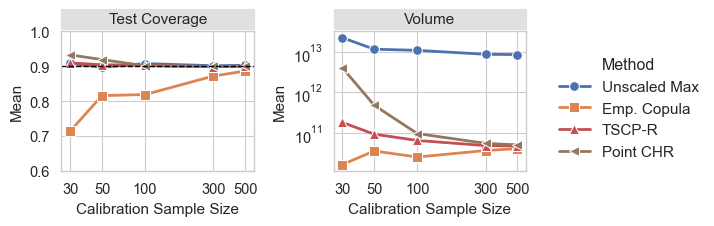

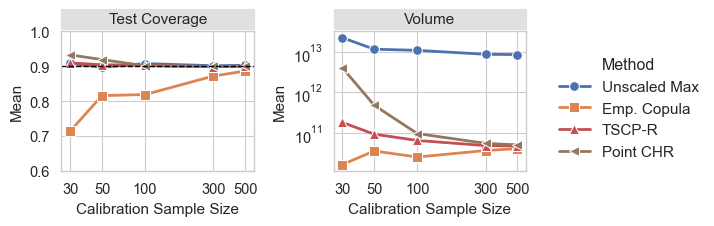

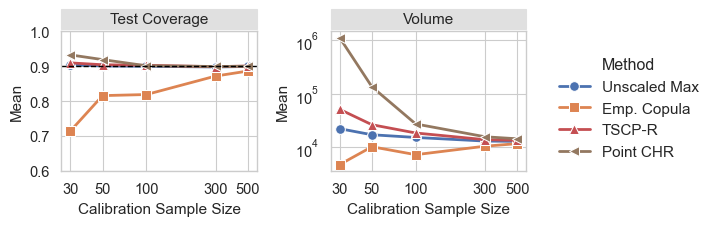

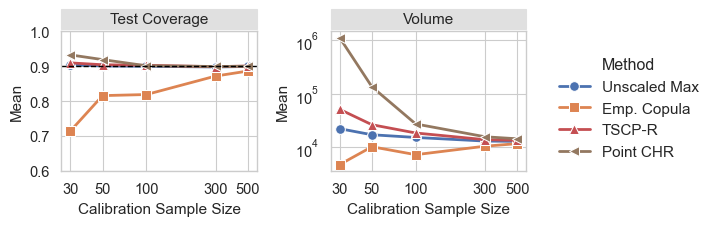

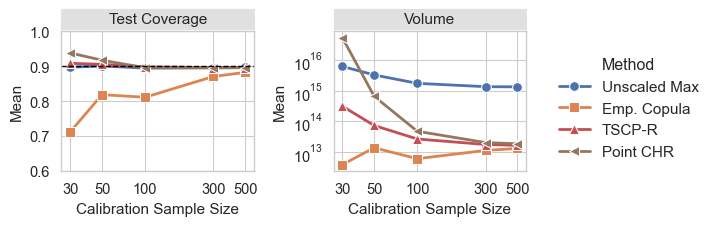

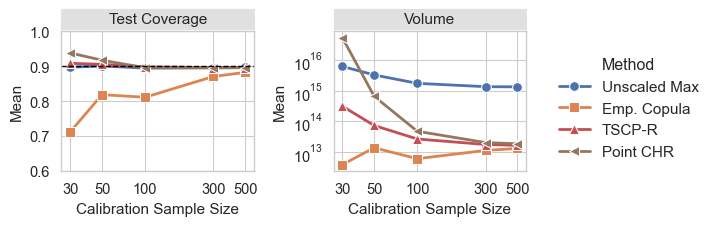

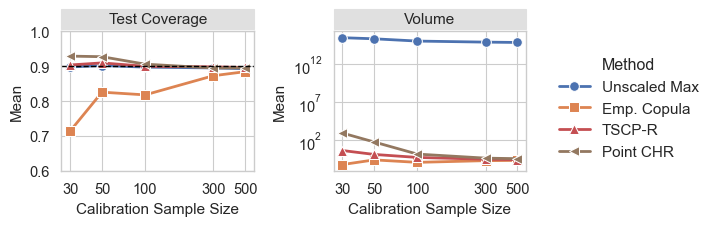

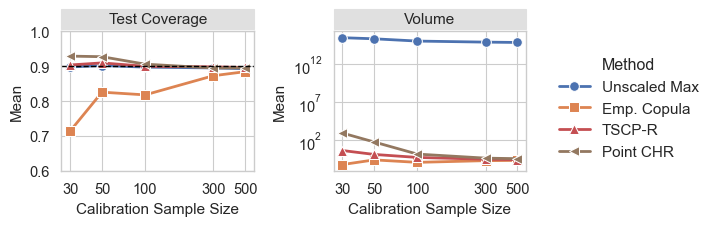

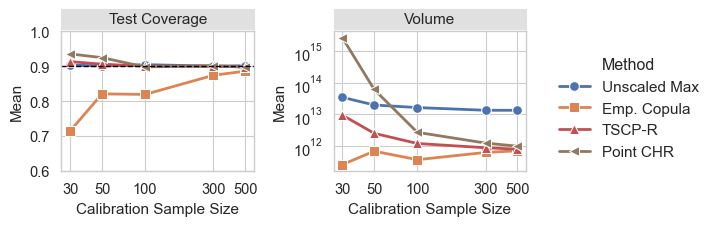

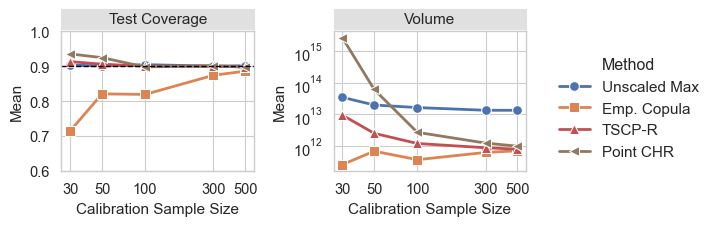

In [19]:
for noise_type in noise_type_list:

    folder_name = "gaussian" if noise_type == "Unit_Gaussian" else noise_type.lower()
    dict1 = {}
    for method in method_list_baselines:
        results = pd.read_csv("syn_exps/"+folder_name+"/"+method.lower()+"_"+noise_type.lower()+".csv")
        dict1[method_name_list_baselines[method]] = results
    for dim in dim_list:
        fig, axes = single_dim_comparison(df_dict=dict1, dim = 10, include_runtime=False, include_legend=True, legend_bbox=(0.85, 0.5), figsize=(6.5,2.5), ncols=1)
        fig.savefig(f"syn_exps/figures/baselines/{noise_type.lower()}_{dim}d.pdf", bbox_inches='tight')
        generate_latex_table_from_csvs(dict1, dim, noise_type, filename=f"syn_exps/figures/baselines/{noise_type.lower()}_{dim}d.tex")



# Testing Our Method on t-distribution

We test our method on the student t distribution with fixed dim and fixed sample but various degree of freedome to see how robust our method is with heavy tailed error.

In [7]:
dim_list_t = [2, 10]
df_list = [1.5, 2, 3, 10, 30, 100]
sample_list_t = [30, 500]

## Graphs

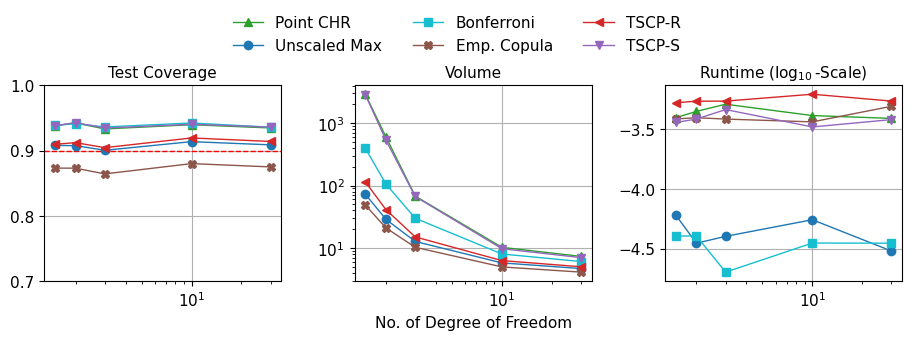

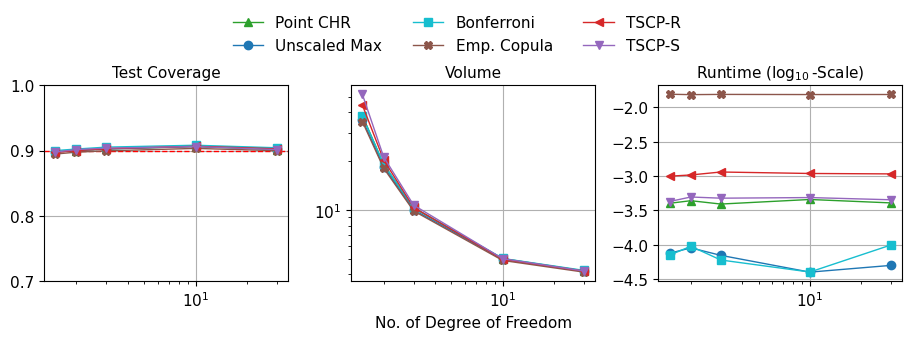

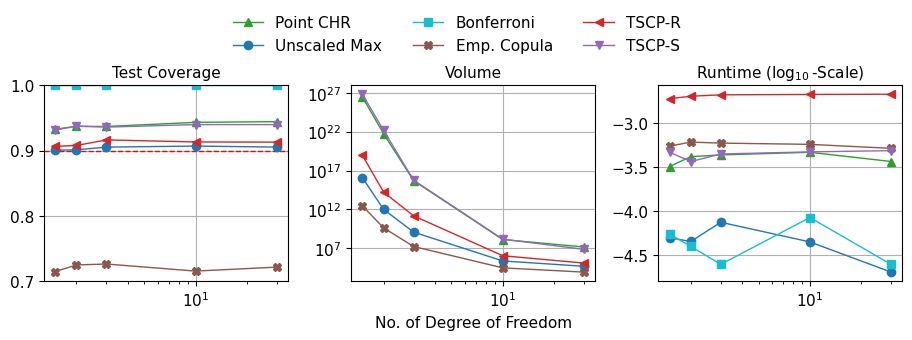

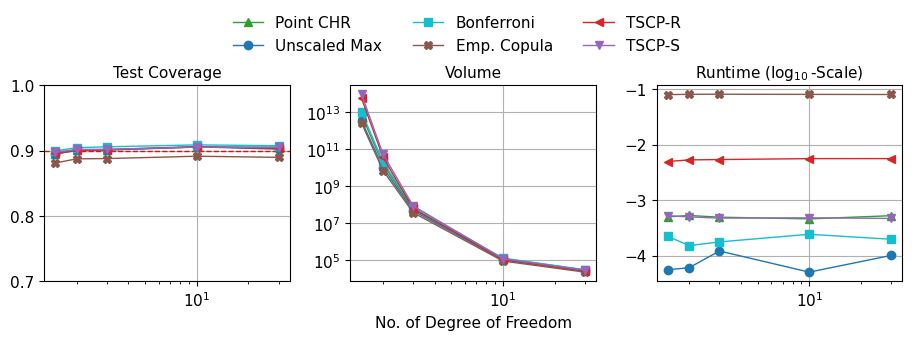

In [19]:
dict_t = {}
for method in method_list_body:
    results = pd.read_csv("syn_exps/t/"+method.lower()+"_t.csv")
    dict_t[method_name_list_body[method]] = results

for dim in dim_list_t:
    for sample in sample_list_t:
        fig, axes = heavy_t_comparison(df_dict=dict_t, dim=dim, sample = sample, n_cols = 3, error_bar=False, bbox_to_anchor=(0.43, 1.15), loc="upper center")
        fig.savefig(f"syn_exps/figures/t/t_n{sample}_{dim}d.pdf", bbox_inches='tight')
        generate_latex_table_from_csvs(dict_t, dim, "Student-t", filename=f"syn_exps/figures/t/t_n{sample}_{dim}d.tex")

# Comparison of Our Methods on 2D-Laplace

We compare all four variants of our method, including the population oracle on 2D Laplace noise. We only do it for 2D because the TSCP-LWC method is almost impossible to finish with large dimensions, but the message overall should be clear.

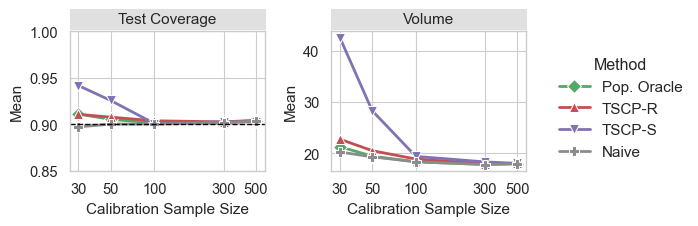

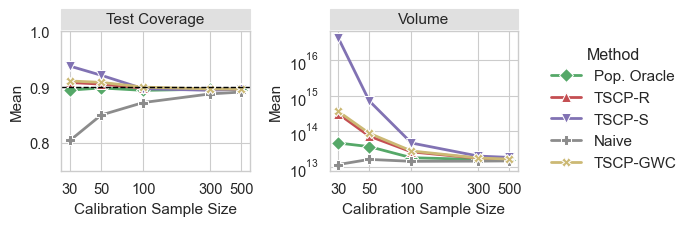

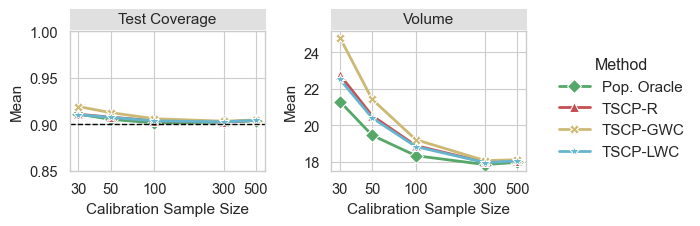

In [33]:
dict_ours1 = {}
for method in method_list_ours1:
    results = pd.read_csv("syn_exps/laplace/"+method.lower()+"_laplace.csv")
    dict_ours1[method_name_list_ours1[method]] = results
fig, axes = single_dim_comparison(df_dict=dict_ours1, dim = 2, include_runtime=False, include_legend=True, legend_bbox=(0.85, 0.5), figsize=(6.5,2.5), ncols=1, ylim = (0.85, 1))
fig.savefig("syn_exps/figures/ours/ours_approximation_2d.pdf", bbox_inches='tight')

dict_ours3 = {}
for method in method_list_ours3:
    results = pd.read_csv("syn_exps/laplace/"+method.lower()+"_laplace.csv")
    dict_ours3[method_name_list_ours3[method]] = results
fig, axes = single_dim_comparison(df_dict=dict_ours3, dim = 10, include_runtime=False, include_legend=True, legend_bbox=(0.85, 0.5), figsize=(6.5,2.5), ncols=1, ylim = (0.75, 1))
fig.savefig("syn_exps/figures/ours/ours_approximation_10d.pdf", bbox_inches='tight')

dict_ours2 = {}
for method in method_list_ours2:
    results = pd.read_csv("syn_exps/laplace/"+method.lower()+"_laplace.csv")
    dict_ours2[method_name_list_ours2[method]] = results
fig, axes = single_dim_comparison(df_dict=dict_ours2, dim = 2, include_runtime=False, include_legend=True, legend_bbox=(0.85, 0.5), figsize=(6.5,2.5), ncols=1, ylim = (0.85, 1))
fig.savefig("syn_exps/figures/ours/ours_containment_2d.pdf", bbox_inches='tight')

In [35]:
dict_ours = dict_ours1|dict_ours2
generate_latex_table_from_csvs(dict_ours, dim = 2, noise_type = "Laplace", filename="syn_exps/figures/ours/ours_comparisons_2d.tex")

In [79]:
generate_latex_table_from_csvs(dict_ours3, dim = 10, noise_type = "Laplace", filename="syn_exps/figures/ours/ours_comparisons_10d.tex")

# Runtime Comparison on 2D Laplace

In [141]:
method_list1 = ["TSCP_LWC", "TSCP_R", "Point_CHR", "Unscaled", "Empirical_copula"]
method_name_list1 = method_name_coverter(method_list1)

In [138]:
for method in method_list1:
    results = run_synthetic_experiment(dim_list=[2, 3, 4, 5, 10, 20, 30], sample_list=[30], alpha_list=[0.1], noise_type="Laplace", trials=30, method=method)
    results.to_csv(f"syn_exps/laplace/{method.lower()}_laplace_30sample.csv")

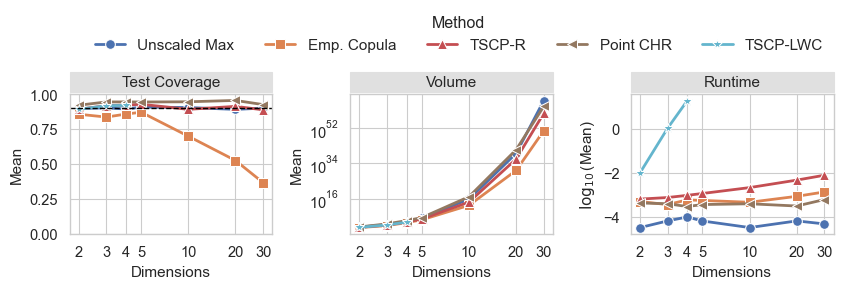

In [142]:
dict1 = {}
for method in method_list1:
    results = pd.read_csv(f"syn_exps/laplace/{method.lower()}_laplace_30sample.csv")
    dict1[method_name_list1[method]] = results
fig, ax = compare_across_dims(df_dict=dict1, ncols=5, legend_bbox=(0.08, 1.05), figsize=(10, 2.5), ylim=(0.0, 1))
fig.savefig("syn_exps/figures/ours/ours_runtime.pdf", bbox_inches='tight')